In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np 

%matplotlib inline

In [67]:
data=pd.read_csv("50_Startups.csv")


In [94]:
data.head(5)

,RD,Administration,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [69]:
data=data.rename(columns={'R&D Spend':'RD','Marketing Spend':'MS'})

In [70]:
data.corr()

,RD,Administration,MS,Profit
RD,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
MS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


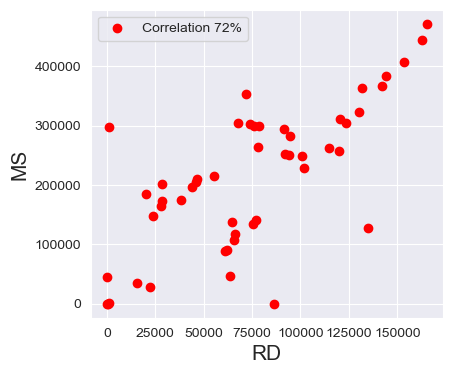

In [33]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(data["RD"],data["MS"],color="red",label="Correlation 72%")
plt.xlabel("RD",size=15)
plt.ylabel("MS",size=15)
plt.legend(loc="best")


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RD              50 non-null     float64
 1   Administration  50 non-null     float64
 2   MS              50 non-null     float64
 3   State           50 non-null     object 
 4   Profit          50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [72]:
data.isna().sum()

RD                0
Administration    0
MS                0
State             0
Profit            0
dtype: int64

# Scatterplot between variables along with histograms

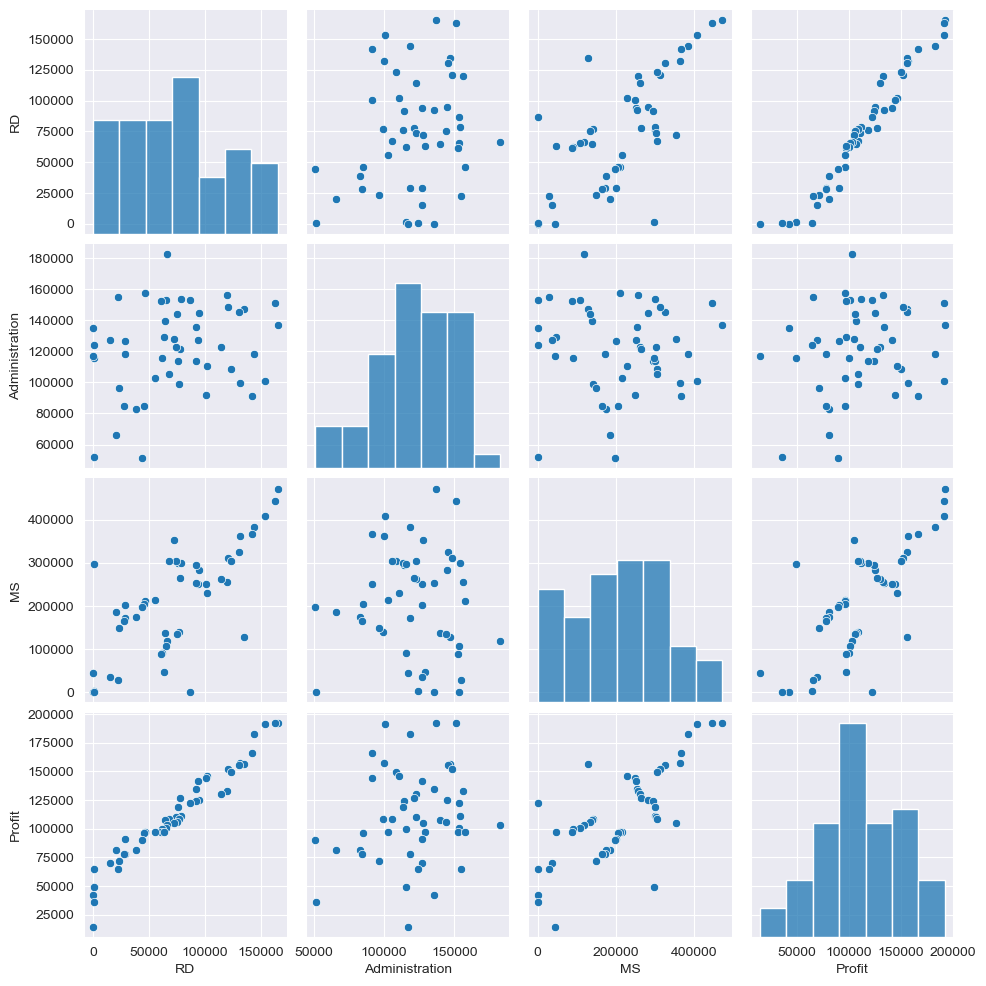

In [73]:
sns.set_style(style='darkgrid')
sns.pairplot(data)

# Preparing a model

In [74]:
import statsmodels.formula.api as smf 
model = smf.ols('Profit ~ RD+Administration+MS',data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Wed, 12 Jul 2023   Prob (F-statistic):           4.53e-30
Time:                        20:11:33   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD                 0.8057      0.045     17.846      0.000       0.715       0.897
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
MS                 0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Calculating VIF

In [49]:
rsq_RD = smf.ols('RD~Administration+MS',data=data).fit().rsquared  
vif_RD = 1/(1-rsq_RD) 
vif_RD

rsq_ADMIN = smf.ols('Administration~RD+MS',data=data).fit().rsquared  
vif_ADMIN = 1/(1-rsq_ADMIN) 
vif_ADMIN

rsq_MS = smf.ols('MS~Administration+RD',data=data).fit().rsquared  
vif_MS = 1/(1-rsq_ADMIN)
vif_MS

d1 = {'Variables':['RD','Administration','MS'],'VIF':[vif_RD,vif_ADMIN,vif_MS]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,RD,2.468903
1,Administration,1.175091
2,MS,1.175091


# Treatment for multicollinearity

In [79]:
print(smf.ols('Profit~RD+Administration',data=data).fit().rsquared)
print(smf.ols('Profit~MS+Administration',data=data).fit().rsquared)

0.9478129385009173
0.6097229746770665


We could see that the when using RD has more rsquare value.So we can eliminate MS.

# Residual Analysis

(array([1., 0., 0., 0., 0., 0., 2., 1., 0., 1., 4., 8., 6., 9., 3., 3., 6.,
        3., 1., 2.]),
 array([-33533.7341113 , -30993.27589008, -28452.81766886, -25912.35944764,
        -23371.90122642, -20831.4430052 , -18290.98478398, -15750.52656276,
        -13210.06834154, -10669.61012032,  -8129.1518991 ,  -5588.69367788,
         -3048.23545666,   -507.77723544,   2032.68098578,   4573.139207  ,
          7113.59742822,   9654.05564943,  12194.51387065,  14734.97209187,
         17275.43031309]),
 <BarContainer object of 20 artists>)

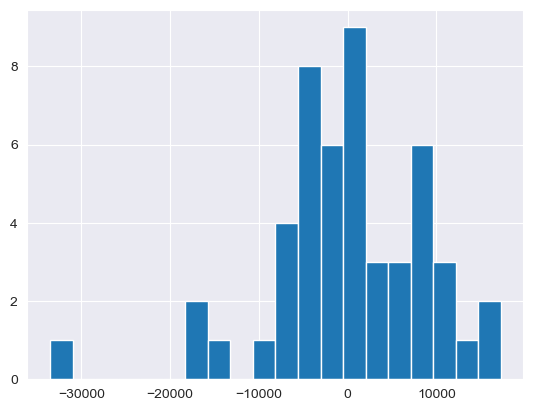

In [81]:
plt.hist(model.resid,bins=20)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa100748730>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa100748cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa100748460>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa1007562b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa100756580>],
 'means': []}

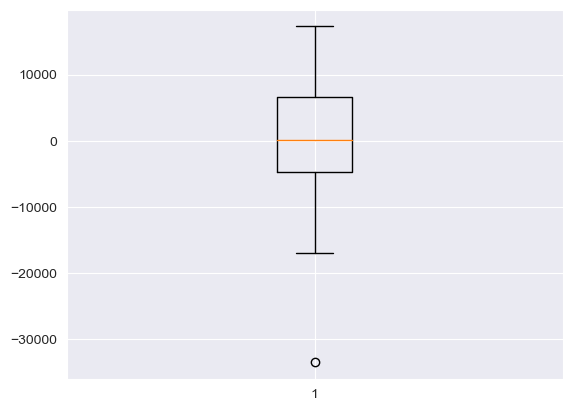

In [82]:
plt.boxplot(model.resid)

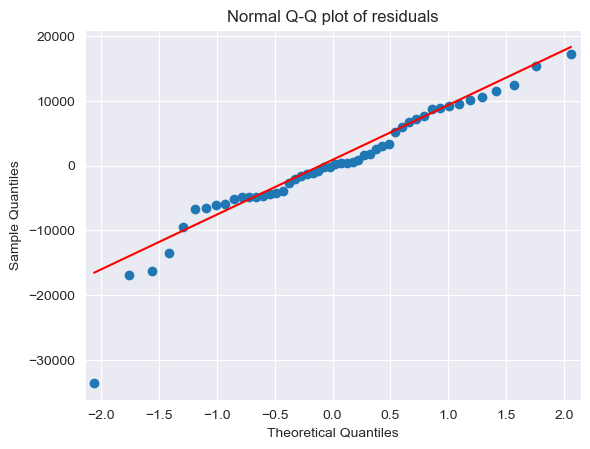

In [83]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # To draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

# Residual Plot for Homoscedasticity

In [84]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

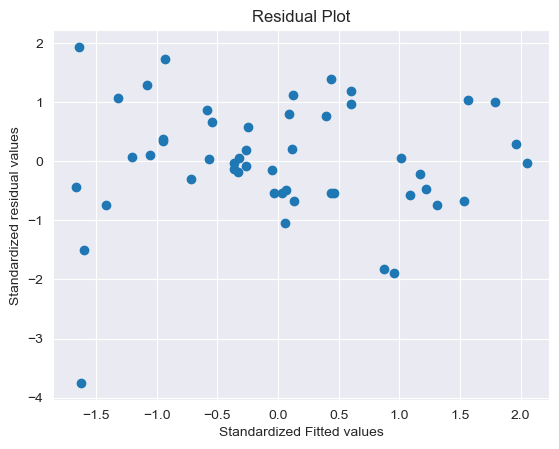

In [85]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# error vs feature

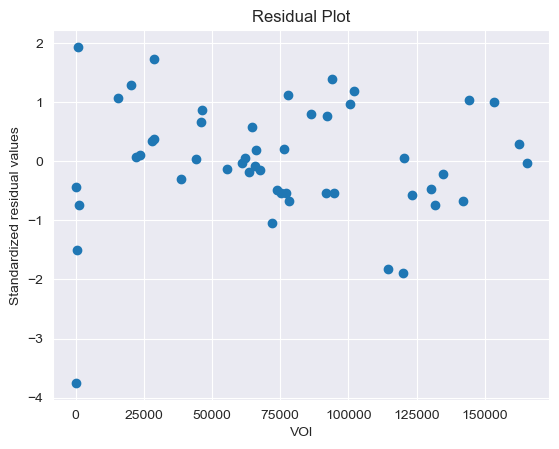

In [86]:
plt.scatter(data["RD"],get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('VOl')
plt.ylabel('Standardized residual values')
plt.show()

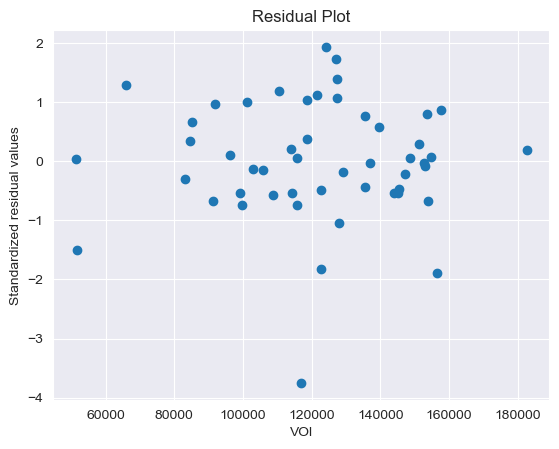

In [88]:
plt.scatter(data["Administration"],get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('VOl')
plt.ylabel('Standardized residual values')
plt.show()

# Model Deletion Diagnostics

# Cook’s Distance

In [89]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

In [90]:
K=4
N=50
(3*K)/N

0.24

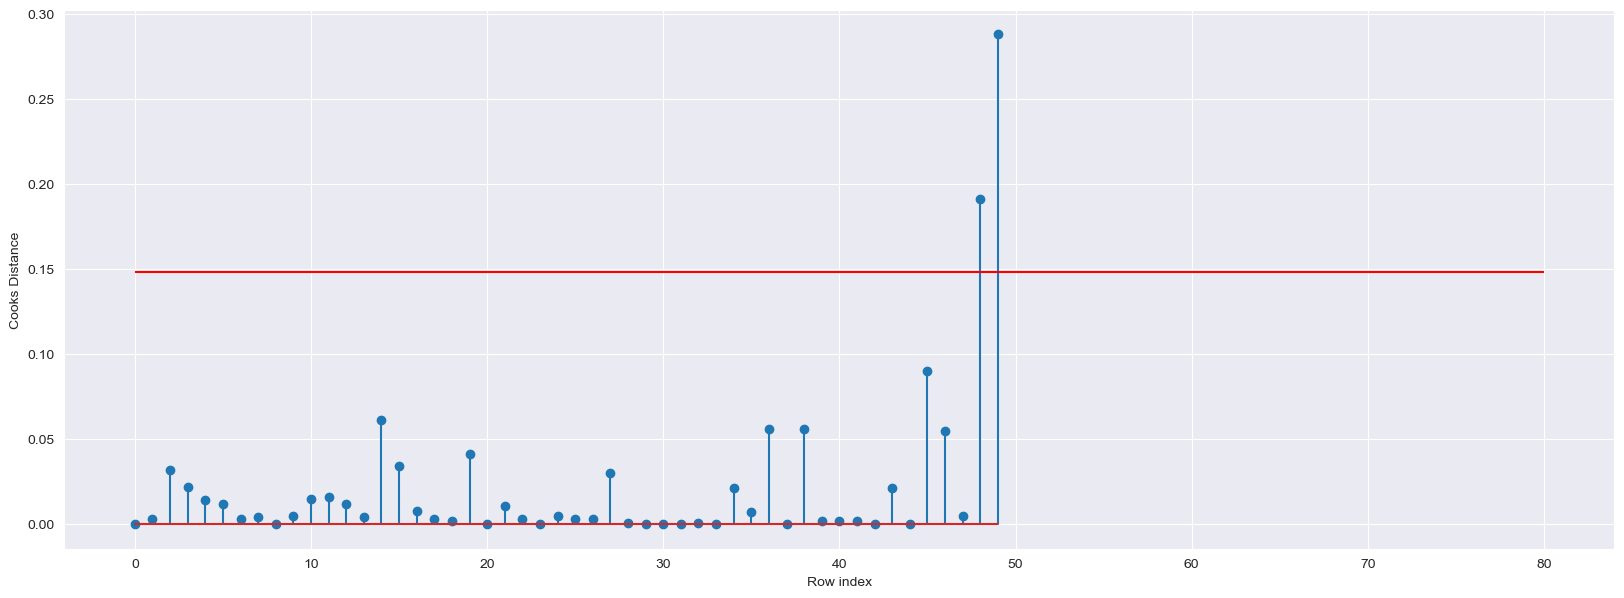

In [95]:
#Plot the influencers values using stem plot
fig = plt.figure(figsize=(20, 7))
plt.stem(np.arange(len(data)), np.round(c, 3))
plt.hlines(y=0.14814814814814814,xmin=0,xmax=80,color="red")
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [96]:
(np.argmax(c),np.max(c))

(49, 0.2880822927543263)

# Improving the model

In [98]:
data_new = pd.read_csv("50_Startups.csv")

In [100]:
data1=data_new.drop(data_new.index[[48,49]],axis=0).reset_index()

In [101]:
data1=data1.drop(['index'],axis=1)

In [102]:
data1

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [104]:
data1=data1.rename(columns={'R&D Spend':'RD','Marketing Spend':'MS'})

# Build Model

In [106]:
final_model=smf.ols('Profit~RD+Administration',data=data1).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     559.7
Date:                Wed, 12 Jul 2023   Prob (F-statistic):           1.62e-32
Time:                        20:53:11   Log-Likelihood:                -494.17
No. Observations:                  48   AIC:                             994.3
Df Residuals:                      45   BIC:                             1000.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       6.273e+04   5182.210     12.106      0.000    5.23e+04    7.32e+04
RD                 0.8229      0.025     33.245      0.000       0.773       0.873
Administration    -0.0837      0.041     -2.041      0.047      -0.166      -0.001
==============================================================================
Omnibus:                        0.197   Durbin-Watson:                   1.780
Prob(Omnibus):                  0.906   Jarque-Bera (JB):                0.396
Skew:                           0.073   Prob(JB):                        0.820
Kurtosis:                       2.580   Cond. No.                     7.24e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.24e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [113]:
import numpy as np
final_model=smf.ols('Profit~RD+np.log(Administration)',data=data1).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     553.6
Date:                Wed, 12 Jul 2023   Prob (F-statistic):           2.05e-32
Time:                        20:56:03   Log-Likelihood:                -494.42
No. Observations:                  48   AIC:                             994.8
Df Residuals:                      45   BIC:                             1000.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               1.539e+05   5.28e+04      2.915      0.006    4.76e+04     2.6e+05
RD                         0.8233      0.025     32.968      0.000       0.773       0.874
np.log(Administration) -8680.0862   4542.909     -1.911      0.062   -1.78e+04     469.802
==============================================================================
Omnibus:                        0.178   Durbin-Watson:                   1.785
Prob(Omnibus):                  0.915   Jarque-Bera (JB):                0.367
Skew:                           0.094   Prob(JB):                        0.832
Kurtosis:                       2.615   Cond. No.                     4.36e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.36e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [119]:
import numpy as np
final_model=smf.ols('Profit~pow(RD,2)+Administration',data=data1).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     209.5
Date:                Wed, 12 Jul 2023   Prob (F-statistic):           1.59e-23
Time:                        20:58:08   Log-Likelihood:                -516.26
No. Observations:                  48   AIC:                             1039.
Df Residuals:                      45   BIC:                             1044.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       8.312e+04   8075.321     10.293      0.000    6.69e+04    9.94e+04
pow(RD, 2)      4.717e-06   2.32e-07     20.329      0.000    4.25e-06    5.18e-06
Administration    -0.0353      0.065     -0.546      0.587      -0.166       0.095
==============================================================================
Omnibus:                        7.659   Durbin-Watson:                   0.605
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                6.812
Skew:                          -0.728   Prob(JB):                       0.0332
Kurtosis:                       4.133   Cond. No.                     5.13e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.13e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# We got best Rsquare value in the below mentioend model.

In [128]:
import numpy as np
final_model2=smf.ols('Profit~RD+pow(Administration,2)',data=data1).fit()
final_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     562.4
Date:                Wed, 12 Jul 2023   Prob (F-statistic):           1.46e-32
Time:                        21:05:38   Log-Likelihood:                -494.06
No. Observations:                  48   AIC:                             994.1
Df Residuals:                      45   BIC:                             999.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               5.817e+04   3229.794     18.010      0.000    5.17e+04    6.47e+04
RD                         0.8220      0.025     33.401      0.000       0.772       0.872
pow(Administration, 2) -3.581e-07   1.71e-07     -2.096      0.042   -7.02e-07    -1.4e-08
==============================================================================
Omnibus:                        0.230   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.891   Jarque-Bera (JB):                0.429
Skew:                           0.045   Prob(JB):                        0.807
Kurtosis:                       2.546   Cond. No.                     5.16e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.16e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [129]:
data2={'Prepared_models':['model','final_model','final_model2'],'Rsquared':[model.rsquared,final_model.rsquared,final_model2.rsquared]}
table=pd.DataFrame(data2)
table

,Prepared_models,Rsquared
0,model,0.950746
1,final_model,0.961534
2,final_model2,0.961534
